<a href="https://colab.research.google.com/github/anazantoro/2109116058_Firzian-Ananta_DataMining/blob/main/Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis

## Library

In [52]:
!pip install git+https://github.com/JustAnotherArchivist/snscrape.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/JustAnotherArchivist/snscrape.git to /tmp/pip-req-build-i9vm6qi5
  Running command git clone --filter=blob:none --quiet https://github.com/JustAnotherArchivist/snscrape.git /tmp/pip-req-build-i9vm6qi5
  Resolved https://github.com/JustAnotherArchivist/snscrape.git to commit c3b216c3cb8593513a018eb3ec4fd6f18d3aba5b
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done


In [53]:
!pip install textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [54]:
!pip install translate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [55]:
import pandas as pd
import snscrape.modules. twitter as sntwitter
import re
from textblob import TextBlob
from translate import Translator
import numpy as np
import matplotlib.pyplot as plt

## Data Preparation

####  Scraping data dari Twitter dengan kata kunci "alditaher" dan rentang tanggal dari 1 Mei 2023 hingga 26 Juni 2023.

In [56]:
hasilSearch = sntwitter.TwitterSearchScraper("alditaher until:2023-06-26 since:2023-05-01")

####  Proses pengambilan tweet dari hasil pencarian, membersihkan teks tweet, melakukan analisis sentimen menggunakan TextBlob, dan menyimpan properti-properti tweet beserta sentimen yang ditentukan ke dalam daftar.

In [57]:
translator = Translator(to_lang="en", from_lang="id")
tweet_properties_list = []

for i, tweet in enumerate(hasilSearch.get_items()):
    tweet_properties = {}
    tweet_properties['tanggal_tweet'] = tweet.date
    tweet_properties['pengguna'] = tweet.user.username
    tweet_properties['isi_tweet'] = tweet.content
    tweet_bersih = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",tweet.content).split())
    
    # translated_text = translator.translate(tweet_bersih)
    
    analysis = TextBlob(tweet_bersih)

    tweet_properties['sentiment'] = 'positive' if analysis.sentiment.polarity > 0.0 else 'negative'


    if tweet.retweetCount > 0:
      if tweet_properties not in tweet_properties_list:
        tweet_properties_list.append(tweet_properties)
    else:
      tweet_properties_list.append(tweet_properties)

    if i == 249:
        break


<ipython-input-57-a72c9d8b389b>:8: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  tweet_properties['isi_tweet'] = tweet.content
<ipython-input-57-a72c9d8b389b>:9: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  tweet_bersih = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",tweet.content).split())


#### Proses iterasi melalui hasil pencarian tweet menggunakan hasilSearch dan menyimpan properti tanggal, pengguna, dan konten tweet dalam daftar tweet_data hingga mencapai batas yang telah ditentukan.



In [58]:
tweet_data = [] 

for i, tweet in enumerate(hasilSearch.get_items()):
    tweet_list=[tweet.date, tweet.user.username, tweet.content]
    tweet_data.append(tweet_list)
    if i == 250 :
        break

<ipython-input-58-112e7dc8a782>:4: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  tweet_list=[tweet.date, tweet.user.username, tweet.content]


#### Data yang sudah di iterasi

In [59]:
tweet_data

[[datetime.datetime(2023, 6, 9, 12, 8, 18, tzinfo=datetime.timezone.utc),
  'swnyn24',
  '@haikalpradiptaa kall wilyumerimii'],
 [datetime.datetime(2023, 6, 9, 12, 7, 45, tzinfo=datetime.timezone.utc),
  'joytystic',
  'tiap liat jeonghan mbek sekarang selalu keingget aldi taher wkwkwkw'],
 [datetime.datetime(2023, 6, 9, 12, 7, 37, tzinfo=datetime.timezone.utc),
  'akunreligi',
  '@mediocrickey Daripada milih yg pura2 bener mending pilih yg ga bener sekalian, go aldi taher 👊🏻'],
 [datetime.datetime(2023, 6, 9, 12, 7, 17, tzinfo=datetime.timezone.utc),
  'ye0chinbuddy',
  'My Lord Aldi Taher joenjoenganku. But honestly speaking, he sounds so real here. Really different with the act in tvOne fiasco.  https://t.co/TvaWzucYfd'],
 [datetime.datetime(2023, 6, 9, 12, 7, 3, tzinfo=datetime.timezone.utc),
  'swnyn24',
  '@haikalpradiptaa KALLL MAKASIHHH😭😭😭😭'],
 [datetime.datetime(2023, 6, 9, 12, 6, 45, tzinfo=datetime.timezone.utc),
  'saoriiladahitam',
  '@menanamanggur Tolong panggilin aldi t

#### Merubah Data Yang Ada Menjadi Dataframe

In [60]:
tweet_df= pd.DataFrame(tweet_data, columns=['date', 'user','tweet'])


In [61]:
tweet_df

,date,user,tweet
0,2023-06-09 12:08:18+00:00,swnyn24,@haikalpradiptaa kall wilyumerimii
1,2023-06-09 12:07:45+00:00,joytystic,tiap liat jeonghan mbek sekarang selalu keingg...
2,2023-06-09 12:07:37+00:00,akunreligi,@mediocrickey Daripada milih yg pura2 bener me...
3,2023-06-09 12:07:17+00:00,ye0chinbuddy,My Lord Aldi Taher joenjoenganku. But honestly...
4,2023-06-09 12:07:03+00:00,swnyn24,@haikalpradiptaa KALLL MAKASIHHH😭😭😭😭
...,...,...,...
246,2023-06-09 09:14:19+00:00,baekgwu,"@Neseli_13 Ih, anjing. Terapi Adler kebaca ter..."
247,2023-06-09 09:13:09+00:00,ZiaFlaty,@kunigamijaksel Aldi taher
248,2023-06-09 09:10:06+00:00,swnyn24,@ressfratchy_ aiyoo banh
249,2023-06-09 09:09:44+00:00,swnyn24,@faelynnelie opkrosss😁👍


##### Labelling

In [62]:
tweet_positif = [t for t in tweet_properties_list if t['sentiment'] == 'positive']
tweet_negatif = [t for t in tweet_properties_list if t['sentiment'] == 'negative']

In [63]:
print(f"""Hasil Sentimen
Positif : {len(tweet_positif)}
Negatif : {len(tweet_negatif)}
""")

Hasil Sentimen
Positif : 24
Negatif : 226



In [64]:
print(tweet_properties_list)

[{'tanggal_tweet': datetime.datetime(2023, 6, 9, 12, 8, 18, tzinfo=datetime.timezone.utc), 'pengguna': 'swnyn24', 'isi_tweet': '@haikalpradiptaa kall wilyumerimii', 'sentiment': 'negative'}, {'tanggal_tweet': datetime.datetime(2023, 6, 9, 12, 7, 45, tzinfo=datetime.timezone.utc), 'pengguna': 'joytystic', 'isi_tweet': 'tiap liat jeonghan mbek sekarang selalu keingget aldi taher wkwkwkw', 'sentiment': 'negative'}, {'tanggal_tweet': datetime.datetime(2023, 6, 9, 12, 7, 37, tzinfo=datetime.timezone.utc), 'pengguna': 'akunreligi', 'isi_tweet': '@mediocrickey Daripada milih yg pura2 bener mending pilih yg ga bener sekalian, go aldi taher 👊🏻', 'sentiment': 'negative'}, {'tanggal_tweet': datetime.datetime(2023, 6, 9, 12, 7, 17, tzinfo=datetime.timezone.utc), 'pengguna': 'ye0chinbuddy', 'isi_tweet': 'My Lord Aldi Taher joenjoenganku. But honestly speaking, he sounds so real here. Really different with the act in tvOne fiasco.  https://t.co/TvaWzucYfd', 'sentiment': 'positive'}, {'tanggal_tweet'

In [65]:
tweet_df = pd.DataFrame.from_records(tweet_properties_list, columns=['tanggal_tweet', 'pengguna', 'isi_tweet', 'sentiment'])

In [66]:
tweet_df


,tanggal_tweet,pengguna,isi_tweet,sentiment
0,2023-06-09 12:08:18+00:00,swnyn24,@haikalpradiptaa kall wilyumerimii,negative
1,2023-06-09 12:07:45+00:00,joytystic,tiap liat jeonghan mbek sekarang selalu keingg...,negative
2,2023-06-09 12:07:37+00:00,akunreligi,@mediocrickey Daripada milih yg pura2 bener me...,negative
3,2023-06-09 12:07:17+00:00,ye0chinbuddy,My Lord Aldi Taher joenjoenganku. But honestly...,positive
4,2023-06-09 12:07:03+00:00,swnyn24,@haikalpradiptaa KALLL MAKASIHHH😭😭😭😭,negative
...,...,...,...,...
245,2023-06-09 09:16:52+00:00,ApriawanArlan,@profesor_saham Siapa yang setuju 2024 Aldi Ta...,negative
246,2023-06-09 09:14:19+00:00,baekgwu,"@Neseli_13 Ih, anjing. Terapi Adler kebaca ter...",negative
247,2023-06-09 09:13:09+00:00,ZiaFlaty,@kunigamijaksel Aldi taher,negative
248,2023-06-09 09:10:06+00:00,swnyn24,@ressfratchy_ aiyoo banh,negative


In [67]:
df = tweet_df

#### Construct Stopwords

In [68]:
import nltk

import requests
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

# CONSTRUCT STOPWORDS
rama_stopword = "https://raw.githubusercontent.com/ramaprakoso/analisis-sentimen/master/kamus/stopword.txt"
yutomo_stopword = "https://raw.githubusercontent.com/yasirutomo/python-sentianalysis-id/master/data/feature_list/stopwordsID.txt"
fpmipa_stopword = "https://raw.githubusercontent.com/onlyphantom/elangdev/master/elang/word2vec/utils/stopwords-list/fpmipa-stopwords.txt"
sastrawi_stopword = "https://raw.githubusercontent.com/onlyphantom/elangdev/master/elang/word2vec/utils/stopwords-list/sastrawi-stopwords.txt"
aliakbar_stopword = "https://raw.githubusercontent.com/onlyphantom/elangdev/master/elang/word2vec/utils/stopwords-list/aliakbars-bilp.txt"
pebahasa_stopword = "https://raw.githubusercontent.com/onlyphantom/elangdev/master/elang/word2vec/utils/stopwords-list/pebbie-pebahasa.txt"
elang_stopword = "https://raw.githubusercontent.com/onlyphantom/elangdev/master/elang/word2vec/utils/stopwords-id.txt"
nltk_stopword = stopwords.words('indonesian')

# create path url for each stopword
path_stopwords = [rama_stopword, yutomo_stopword, fpmipa_stopword, sastrawi_stopword, 
                  aliakbar_stopword, pebahasa_stopword, elang_stopword]

# combine stopwords
stopwords_l = nltk_stopword
for path in path_stopwords:
    response = requests.get(path)
    stopwords_l += response.text.split('\n')

custom_st = '''
yg yang dgn ane smpai bgt gua gwa si tu ama utk udh btw
ntar lol ttg emg aj aja tll sy sih kalo nya trsa mnrt nih
ma dr ajaa tp akan bs bikin kta pas pdahl bnyak guys abis tnx
bang banget nang mas amat bangettt tjoy hemm haha sllu hrs lanjut
bgtu sbnrnya trjadi bgtu pdhl gt https sm plg skrg 
'''

# create dictionary with unique stopword
st_words = set(stopwords_l)
custom_stopword = set(custom_st.split())

# result stopwords
stop_words = st_words | custom_stopword
print(f'Stopwords: {list(stop_words)[:5]}')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Stopwords: ['segala', 'sekadar', 'terbanyak', 'gimana', 'menjawab']


#### Text Cleaning

In [69]:
import re

# cleaning text
def cleaning_text(text):
    # remove url
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    text =  url_pattern.sub(r'', text)

    # remove hashtags
    # only removing the hash # sign from the word
    text = re.sub(r'#', '', text)

    # remove mention handle user (@)
    text = re.sub(r'@[\w]*', ' ', text)

    # remove punctuation
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    for x in text.lower(): 
        if x in punctuations: 
            text = text.replace(x, " ") 
    
    # remove extra whitespace
    text = text.strip()

    # lowercase
    text = text.lower()
    return text

In [104]:
for i in range(len(tweet_df)):
      clean_tweet = re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|(\bt\s*co\b)|(https)|(link)","", tweet_df['isi_tweet'][i])
      tweet_df.loc[i, 'isi_tweet'] = clean_tweet

##### Positive Words

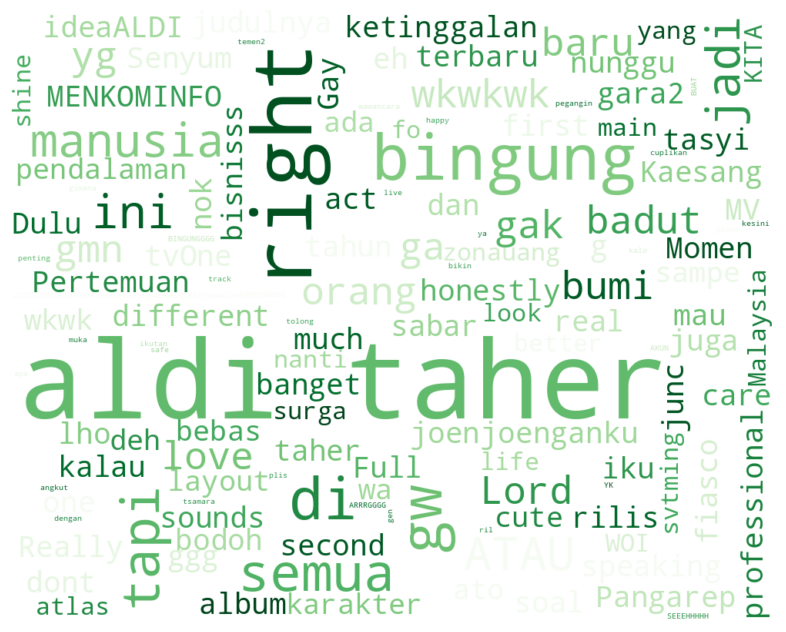

In [71]:
from wordcloud import WordCloud

# wordcloud tweet sentiment positive
data_pos = df[df['sentiment'] == 'positive']

all_text = ' '.join(word for word in data_pos['isi_tweet'])
wordcloud = WordCloud(colormap='Greens', width=1000, height=800, mode='RGBA', background_color='white').generate(all_text)

plt.figure(figsize=(20,10), dpi=80)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

##### Negative Words

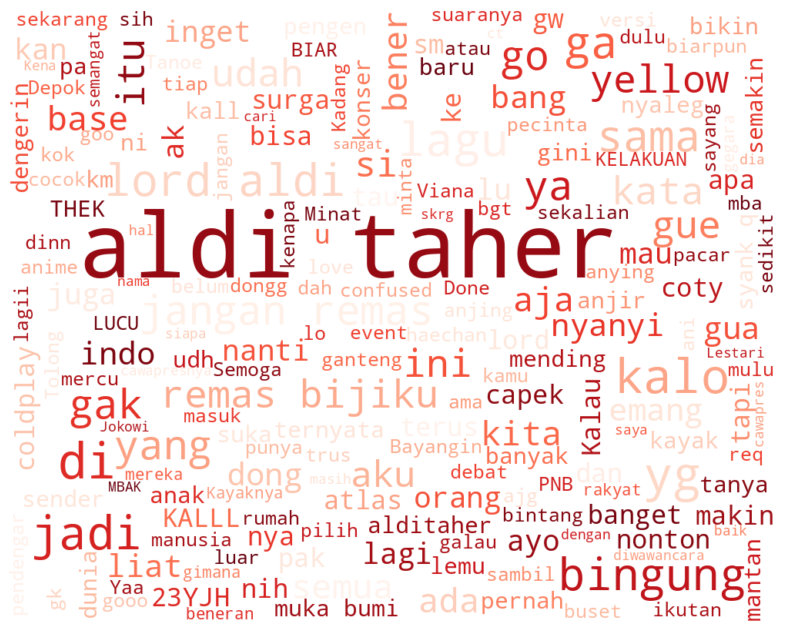

In [72]:
# wordcloud tweet sentiment negative
data_neg = df[df['sentiment'] == 'negative']

all_text = ' '.join(word for word in data_neg['isi_tweet'])
wordcloud = WordCloud(colormap='Reds', width=1000, height=800, mode='RGBA', background_color='white').generate(all_text)

plt.figure(figsize=(20,10), dpi=80)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

#### Handling Stopwords

In [73]:
# remove stopwords
from nltk import word_tokenize, sent_tokenize

def remove_stopword(text, stop_words=stop_words):
    word_tokens = word_tokenize(text)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    return ' '.join(filtered_sentence)

In [74]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [75]:
# stemming and lemmatization
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming_and_lemmatization(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    return stemmer.stem(text)

In [76]:
# tokenization
def tokenize(text):
    return word_tokenize(text)

## Modelling

#### Preprocessing

In [77]:
# pipeline preprocess
def preprocess(text):
    # cleaning text and lowercase
    output = cleaning_text(text)

    # remove stopwords
    output = remove_stopword(output)

    # stemming and lemmatization
    output = stemming_and_lemmatization(output)

    # tokenization
    output = tokenize(output)

    return output

In [78]:
# implement preprocessing
preprocessed_data = df.copy()
preprocessed_data['Text Tweet'] = df['isi_tweet'].map(preprocess)

#### Splitting Train and Test

In [79]:
from sklearn.model_selection import train_test_split

X = preprocessed_data['isi_tweet']
y = preprocessed_data['sentiment']

X.head()

0                                    kall wilyumerimii
1    tiap liat jeonghan mbek sekarang selalu keingg...
2     Daripada milih yg pura2 bener mending pilih y...
3    My Lord Aldi Taher joenjoenganku But honestly ...
4                                      KALLL MAKASIHHH
Name: isi_tweet, dtype: object

In [80]:
# mapping, negative = 0, positive = 1
y = y.map({'negative':0, 'positive':1})
y.head()

0    0
1    0
2    0
3    1
4    0
Name: sentiment, dtype: int64

In [81]:
train_x, test_x, train_y, test_y = train_test_split(X, y,
                                                    test_size=0.1,
                                                    stratify=y,
                                                    random_state=2021)

train_x.shape, train_y.shape, test_x.shape, test_y.shape

((225,), (225,), (25,), (25,))

#### Menghitung frekuensi setiap pasangan (kata, sentimen) dari kumpulan tweet dan label sentimen yang diberikan

In [82]:
def build_freqs(tweets, ys):
    """Build frequencies.
    Input:
        tweets: a list of tweets
        ys: an m x 1 array with the sentiment label of each tweet
            (either 0 or 1)
    Output:
        freqs: a dictionary mapping each (word, sentiment) pair to its
        frequency
    """
    # Convert np array to list since zip needs an iterable.
    # The squeeze is necessary or the list ends up with one element.
    # Also note that this is just a NOP if ys is already a list.
    yslist = np.squeeze(ys).tolist()

    # Start with an empty dictionary and populate it by looping over all tweets
    # and over all processed words in each tweet.
    freqs = {}
    for y, tweet in zip(yslist, tweets):
        for word in tweet:
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1

    return freqs

In [83]:
# create vocabulary / dictionary frequencies
freqs = build_freqs(train_x.tolist(), train_y.tolist())

# check the output
print("type(freqs) = " + str(type(freqs)))
print("len(freqs) = " + str(len(freqs.keys())))

type(freqs) = <class 'dict'>
len(freqs) = 109


####  Menghasilkan vektor fitur berdimensi (1, 3) untuk satu tweet berdasarkan frekuensi kata-kata dalam tweet tersebut yang telah disimpan dalam kamus freqs.

In [84]:
def extract_features(tweet, freqs):
    '''
    Input: 
        tweet: a list of words for one tweet
        freqs: a dictionary corresponding to the frequencies of each tuple (word, label)
    Output: 
        x: a feature vector of dimension (1,3)
    '''
    
    # 3 elements in the form of a 1 x 3 vector
    x = np.zeros((1, 3)) 
    
    #bias term is set to 1
    x[0,0] = 1 
    
    # loop through each word in the list of words
    for word in tweet:
        
        # increment the word count for the positive label 1
        x[0,1] += freqs.get((word, 1.),0)
        
        # increment the word count for the negative label 0
        x[0,2] += freqs.get((word, 0.),0)
        
    assert(x.shape == (1, 3))
    return x

In [85]:
# test extract features function
tmp = extract_features(train_x.to_numpy()[0], freqs)

print(f'text: {train_x.to_numpy()[0]}')
print(f'feature extraction result: {tmp}')

text:  ekhem
feature extraction result: [[1.000e+00 4.870e+02 3.354e+03]]


In [86]:
# extract all of the features

# collect the features 'x' and stack them into a matrix 'X'
X_train = np.zeros((len(train_x), 3))
for i in range(len(train_x)):
    X_train[i, :]= extract_features(train_x.to_numpy()[i], freqs)

X_train[:5]

array([[1.0000e+00, 4.8700e+02, 3.3540e+03],
       [1.0000e+00, 3.6650e+03, 2.4937e+04],
       [1.0000e+00, 1.0140e+03, 7.0160e+03],
       [1.0000e+00, 3.8090e+03, 2.5466e+04],
       [1.0000e+00, 5.2100e+02, 3.6080e+03]])

In [87]:
# collect the features 'x' and stack them into a matrix 'X'
X_test = np.zeros((len(test_x), 3))
for i in range(len(test_x)):
    X_test[i, :]= extract_features(test_x.to_numpy()[i], freqs)

#### Metrik Pengukuran yang dipakai

In [88]:
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

#Model Select
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

#### Build Model

##### Random Forest

In [89]:
random_forest = RandomForestClassifier(n_estimators=100)

In [90]:
random_forest.fit(X_train, train_y)

RandomForestClassifier()

In [91]:
rf_predictions = random_forest.predict(X_test)

In [92]:
rf_probabilities = random_forest.predict_proba(X_test)[:, 1]

##### SVM

In [93]:
svm_model = SVC(kernel='linear', probability=True)

In [94]:
svm_model.fit(X_train, train_y)

SVC(kernel='linear', probability=True)

In [95]:
svm_predictions = svm_model.predict(X_test)

In [96]:
svm_probabilities = svm_model.predict_proba(X_test)[:, 1]

## Evaluation

#### Menghitung metrik evaluasi untuk Random Forest

In [97]:
rf_accuracy = accuracy_score(test_y, rf_predictions)
rf_precision = precision_score(test_y, rf_predictions, average='micro')
rf_recall = recall_score(test_y, rf_predictions, average='micro')
rf_f1 = f1_score(test_y, rf_predictions, average='micro')

#### Menghitung metrik evaluasi untuk SVM

In [98]:
svm_accuracy = accuracy_score(test_y, svm_predictions)
svm_precision = precision_score(test_y, svm_predictions, average='micro')
svm_recall = recall_score(test_y, svm_predictions, average='micro')
svm_f1 = f1_score(test_y, svm_predictions, average='micro')

#### Confusion Matrix

In [99]:
import seaborn as sns

##### RF CM

In [100]:
rf_cm = confusion_matrix(test_y, rf_predictions)

In [101]:
plt.figure(figsize=(10, 4))

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

Text(50.722222222222214, 0.5, 'True Labels')

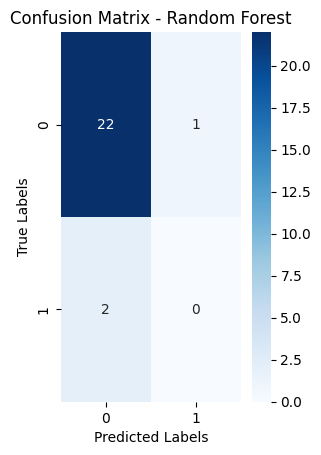

In [102]:
plt.subplot(1, 2, 1)
sns.heatmap(rf_cm, annot=True, cmap="Blues", fmt="d")
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

##### SVM CM

In [105]:
svm_cm = confusion_matrix(test_y, rf_predictions)

In [106]:
plt.figure(figsize=(10, 4))

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

Text(321.26767676767673, 0.5, 'True Labels')

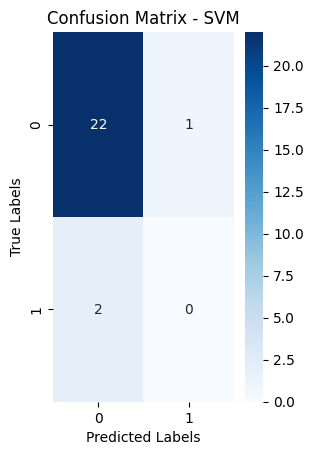

In [107]:
plt.subplot(1, 2, 2)
sns.heatmap(svm_cm, annot=True, cmap="Blues", fmt="d")
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

#### Visual Preparation

In [108]:
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
rf_scores = [rf_accuracy, rf_precision, rf_recall, rf_f1]
svm_scores = [svm_accuracy, svm_precision, svm_recall, svm_f1]

In [109]:
x = np.arange(len(labels))
width = 0.35

#### Model Comparison

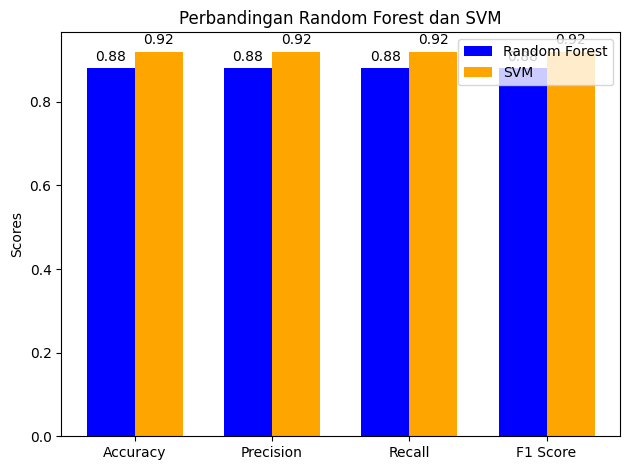

In [110]:
# Plotting
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, rf_scores, width, label='Random Forest', color='blue')
rects2 = ax.bar(x + width/2, svm_scores, width, label='SVM', color='orange')

# Menambahkan nilai pada setiap batang
for rect in rects1:
    height = rect.get_height()
    ax.annotate('{:.2f}'.format(height),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

for rect in rects2:
    height = rect.get_height()
    ax.annotate('{:.2f}'.format(height),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

# Penyesuaian tampilan
ax.set_ylabel('Scores')
ax.set_title('Perbandingan Random Forest dan SVM')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Menampilkan plot
plt.tight_layout()
plt.show()